In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from predominantmelodymakam.predominantmelodymakam import PredominantMelodyMakam

import os 
import json


In [2]:
extractor = PredominantMelodyMakam()

audiofolder = 'd2731692-626d-4a6d-9b67-a70c9e7b9745'

# we use an audio recording converted from the Robert Garfias's videos, mbid:d2731692-626d-4a6d-9b67-a70c9e7b9745
# this is a short excerpt starting from the 501st second
# NOTE: Always use wav if you need milisecond precision, to avoid the delays introduced by encoder/decoders
audiofile = os.path.join(audiofolder, 'd2731692-626d-4a6d-9b67-a70c9e7b9745_excerpt501sec.wav') 

jsonfile = os.path.join(audiofolder, 'predominantMelody.json') # json file


In [3]:
print(os.path.basename(audiofile))

results = extractor.run(audiofile)
pitch = results['settings']  # collapse the keys in settings
pitch['pitch'] = results['pitch']

# json file
json.dump(pitch, open(jsonfile, 'w'))


d2731692-626d-4a6d-9b67-a70c9e7b9745_excerpt501sec.wav


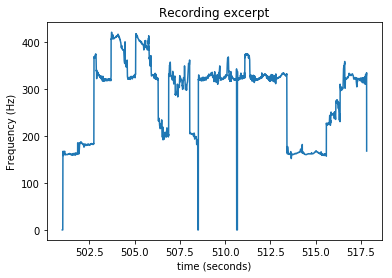

In [4]:
# plot, start time from 501st second
tt = [p[0]+501.0 for p in pitch['pitch']]
pp = [p[1] for p in pitch['pitch']]

plt.plot(tt, pp)
plt.xlabel("time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title('Recording excerpt')
plt.show()
